# The Algorithmic Approach to Winning "Guess Who?" Game

The following script orchestrates a comprehensive sequence of tasks, including data preparation, model training, feature importance analysis, and decision tree visualization, aimed at enhancing understanding and strategic insight into optimal gameplay strategy for the "Guess Who?" game.

Initially, to ensure efficient management of Python package dependencies and streamline environment setup, execute the provided code block. 

The initial line captures the current state of installed Python packages within the environment and saves this information to a file named "freeze_file.txt". This file serves to enumerate all installed packages alongside their version numbers, serving as a record before proceeding with the installation of required packages specific to this Jupyter Notebook.

Subsequently, the second line directs pip, the Python package manager, to install the packages delineated in the "requirements.txt" file. This file specifies the necessary packages along with their version numbers, enabling straightforward installation of dependencies essential for project execution. Employing packages from "requirements.txt" ensures alignment of the project environment with the requisite dependencies, thus minimizing compatibility concerns and ensuring seamless code execution.

In [ ]:
# Save the current state of installed Python packages to a file named 'freeze_file.txt'
!pip freeze > freeze_file.txt

# Install Python packages listed in the 'requirements.txt' file
!pip install -r requirements.txt

## Data Preparation

Initially, the code reads a dataset containing all 24 characters of the game from a CSV file. This dataset encompasses the characters' English and Greek names in the first two columns, while subsequent columns correspond to questions posed, with binary responses denoting Yes (1) or No (0) for each character entry.

In [2]:
# Import the pandas library and alias it as pd
import pandas as pd


# Load the dataset from a CSV file named 'guess_who_dataset.csv'
data = pd.read_csv('guess_who_dataset.csv')

# Display the loaded dataset
data

,English_Name,Greek_Name,Man,White_Hair,Blonde_Hair,Brown_Hair,Black_Hair,Blue_Hair,Purple_Hair,Bald,Two_colour_hair,Beard,Moustache,Glasses,Wear_sth_on_head,Earring,Blue_eyes,Green_eyes,Brown_eyes,Freckles
0,Al,Αλέξανδρος,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,Amy,Μερόπη,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,Ben,Γιώργος,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,Carmen,Φαίδρα,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,Daniel,Σπύρος,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
5,David,Λάζαρος,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
6,Emma,Δήμητρα,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7,Eric,Διονύσης,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
8,Farah,Αθηνά,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,Gabe,Βασίλης,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


Subsequently, the dataset undergoes segregation into distinct entities: features (X) and the target variable (y).

In [3]:
# Separate features (X) and target variable (y)
# 'English_Name' and 'Greek_Name' columns are dropped from the features (X)
X = data.drop(['English_Name', 'Greek_Name'], axis=1)

# 'English_Name' column is set as the target variable (y)
y = data['English_Name']

Following the initial data segmentation, the subsequent stages entail the training of diverse machine learning models on the dataset, encompassing the utilization of Decision Trees, Random Forest, Gradient Boosting, and LightGBM algorithms.

## Decision Tree

`Decision Trees` represent a non-parametric supervised learning technique employed for both classification and regression tasks. This methodology endeavors to construct a model that forecasts the value of a target variable through the acquisition of elementary decision rules deduced from the features present within the dataset. Furthermore, Decision Trees exhibit proficiency in executing multi-class classification endeavors on diverse datasets.

In the code below, a `Decision Tree Classifier` is instantiated. Various parameters are specified to configure the behavior of this classifier. 

The values selected for each parameter in the instantiation of the `DecisionTreeClassifier` serve to configure the behavior and structure of the decision tree model:

- **criterion='gini'**: This specifies that the Gini impurity criterion is used to measure the quality of splits. Gini impurity measures the degree of impurity in a set of samples, with lower values indicating purer subsets.

- **splitter='best'**: The 'best' value indicates that the optimal strategy is employed for selecting the split at each node. This strategy chooses the split that maximizes the information gain or minimizes impurity.

- **max_depth=None**: This parameter sets the maximum depth of the decision tree. A value of None means that nodes will be expanded until all leaves are pure or until all leaves contain less than the minimum samples required for splitting.

- **min_samples_split=2**: It sets the minimum number of samples required to split an internal node. In this case, a node will only be split if it contains at least 2 samples.

- **min_samples_leaf=1**: This parameter specifies the minimum number of samples required to be at a leaf node. Each leaf in the tree will have at least one sample.

- **min_weight_fraction_leaf=0.0**: It sets the minimum weighted fraction of the sum total of weights required to be at a leaf node. In this case, the leaf nodes are not constrained by the sum of weights.

- **max_features=None**: This parameter determines the number of features to consider when looking for the best split. A value of None indicates that all features will be considered.

- **random_state=0**: It sets the random seed used by the random number generator. By fixing the random state to a specific value (0 in this case), the randomness of the model's behavior is controlled, ensuring reproducible results.

- **max_leaf_nodes=None**: This parameter sets the maximum number of leaf nodes in the decision tree. A value of None implies that there is no maximum limit on the number of leaf nodes.

- **min_impurity_decrease=0.0**: It sets the minimum impurity decrease required for a split to be performed. A split will only be made if it induces a decrease in impurity greater than or equal to this value.

- **class_weight=None**: This parameter allows setting weights for each class in the dataset. A value of None implies that all classes are treated equally.

- **ccp_alpha=0.0**: It sets the complexity parameter used for Minimal Cost-Complexity Pruning. A higher value of ccp_alpha increases the amount of pruning, resulting in simpler trees.

- **monotonic_cst=None**: This parameter constrains the decision path to be monotonic, which can be used in scenarios where the relationship between features and the target variable is known to be monotonic. A value of None indicates no monotonic constraint is imposed.

In essence, this instantiation defines the configuration of the Decision Tree Classifier, specifying how it will learn from data and make predictions. Then, the classifier is trained on the features and classes of the dataset.

In [4]:
# Import necessary modules from scikit-learn
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz


# Create an instance of a DecisionTreeClassifier with a specified random state
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

# Train the DecisionTreeClassifier model on the features (X) and target variable (y)
clf = clf.fit(X, y)

Following the model training, the decision tree classifier is visualized to elucidate the decision-making process. The visualization showcases how each character's identification is facilitated through a structured inquiry process, wherein a minimum of three and a maximum of eight (3-8) questions are required to be posed.

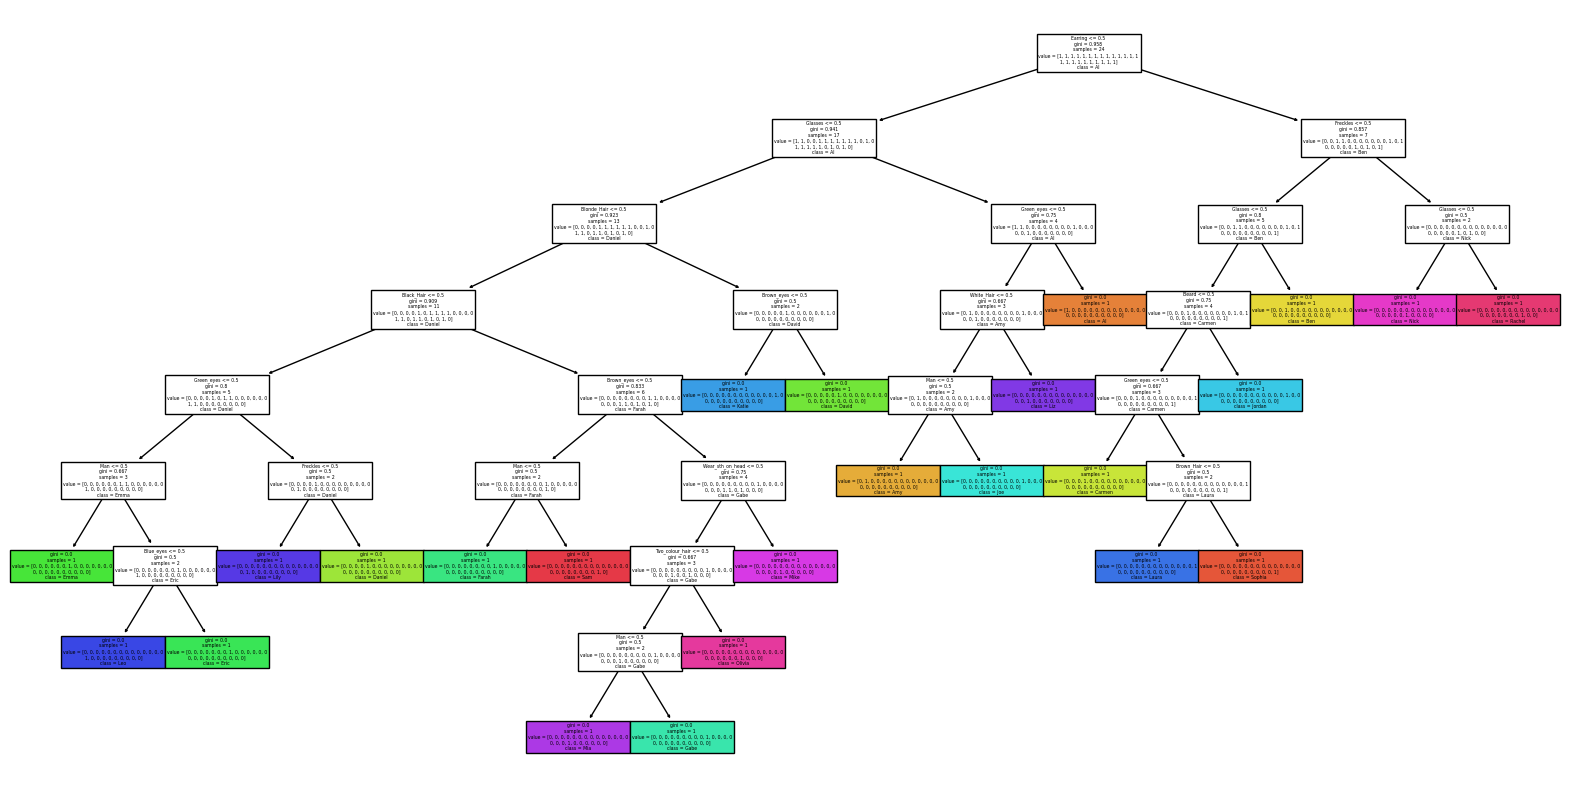

In [5]:
# Import the necessary module for visualization from matplotlib
import matplotlib.pyplot as plt


# Visualize the decision tree
# Set the size of the figure for better visualization
plt.figure(figsize=(20,10))

# Plot the decision tree
# feature_names specifies the names of the features for better interpretation
# class_names specifies the names of the classes (unique target values) for better interpretation
# filled=True fills the nodes with colors representing the majority class
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True)

# Display the plot
plt.show()

Ultimately, the decision tree generated through the model training process is presented in a format optimized for heightened clarity and comprehension. This involves the creation of a more detailed graphical representation utilizing DOT data and the `Graphviz` graph visualization library. The resulting visualization serves to offer a comprehensive depiction of the decision tree's structure, facilitating a nuanced understanding of the decision-making pathways and criteria employed by the classifier.

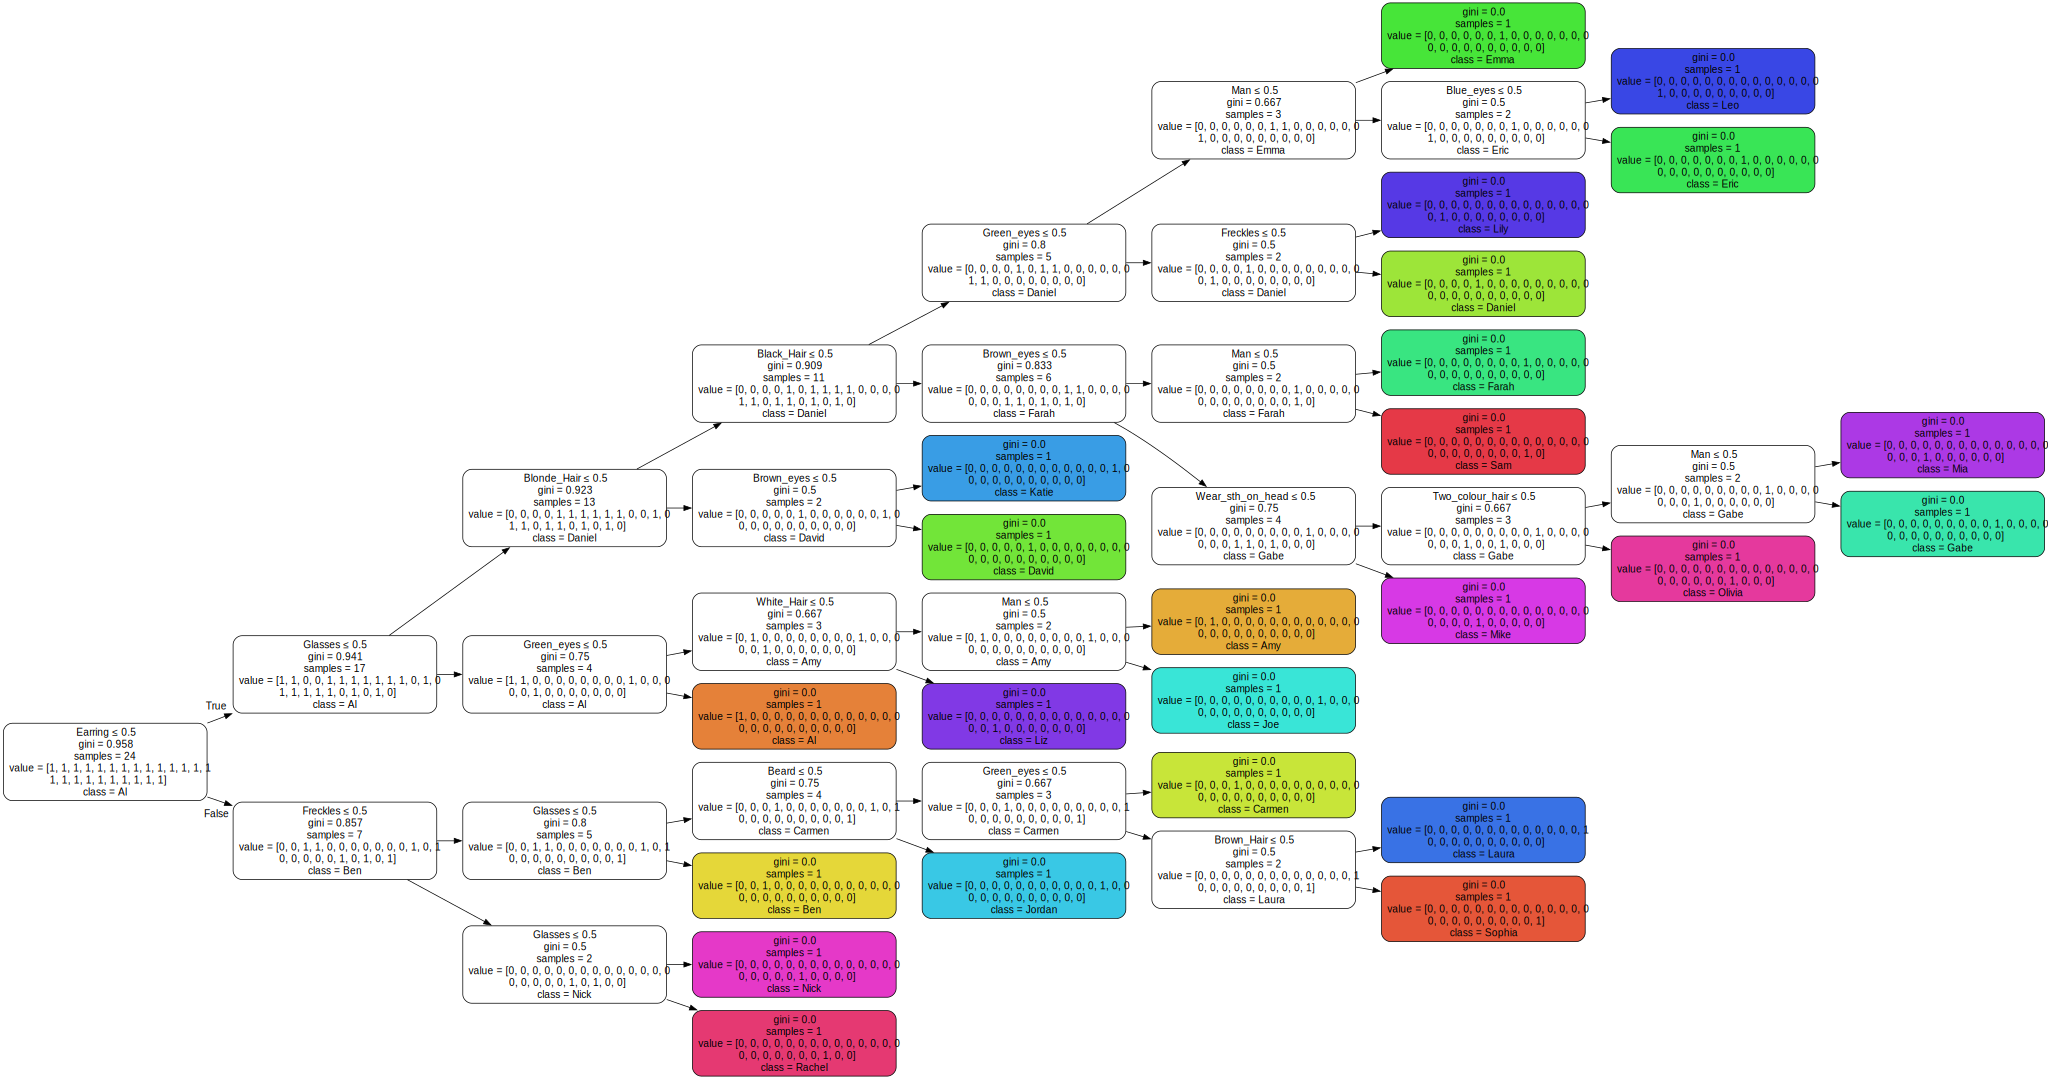

In [6]:
# Import the necessary module for graph visualization
import graphviz


# Generate DOT data for the decision tree
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=list(X.columns.values),  
                     class_names=y.values,  
                     filled=True, rounded=True, rotate=True,
                     special_characters=True)

# Create a graph object from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph
graph

## Random Forest

A `Random Forest` is a meta-estimator utilized in machine learning, which entails fitting a multitude of decision tree classifiers on diverse sub-samples of the dataset. Through the process of averaging, it aims to enhance predictive accuracy and mitigate overfitting tendencies. Notably, the constituent trees within the forest adhere to the optimal split strategy, akin to the utilization of "best" splitter parameter. Moreover, each tree is constructed utilizing the entirety of the dataset.

In the code snippet below, a `RandomForestClassifier` is instantiated. This involves the specification of various parameters to govern the behavior and configuration of the classifier. The values assigned to each parameter during the instantiation process serve to delineate the operational characteristics and structural attributes of the Random Forest model:

- **n_estimators=100**: This parameter specifies the number of decision trees in the random forest. In this case, 100 decision trees will be built.
- **criterion='gini'**: It indicates the criterion used for measuring the quality of splits in each decision tree. Here, the Gini impurity criterion is employed.
- **max_depth=3**: This parameter determines the maximum depth of each decision tree in the forest. A value of 3 indicates that each decision tree will have a maximum depth of 3 levels.
- **min_samples_split=2**: It sets the minimum number of samples required to split an internal node. In this case, a node will only be split if it contains at least 2 samples.
- **min_samples_leaf=1**: This parameter specifies the minimum number of samples required to be at a leaf node. Each leaf in the tree will have at least one sample.
- **min_weight_fraction_leaf=0.0**: It sets the minimum weighted fraction of the sum total of weights required to be at a leaf node. In this case, the leaf nodes are not constrained by the sum of weights.
- **max_features=None**: This parameter determines the number of features to consider when looking for the best split. A value of None indicates that all features will be considered.
- **max_leaf_nodes=None**: This parameter sets the maximum number of leaf nodes in each decision tree. A value of None implies that there is no maximum limit on the number of leaf nodes.
- **min_impurity_decrease=0.0**: It sets the minimum impurity decrease required for a split to be performed. A split will only be made if it induces a decrease in impurity greater than or equal to this value.
- **bootstrap=False**: This parameter specifies whether bootstrap samples are used when building trees. Here, bootstrap sampling is disabled.
- **oob_score=False**: It determines whether out-of-bag samples are used to estimate the generalization accuracy of the random forest. Here, out-of-bag scoring is disabled.
- **n_jobs=None**: This parameter specifies the number of jobs to run in parallel for both fitting and predicting. A value of None implies that all processors are used.
- **random_state=0**: It sets the random seed used by the random number generator. By fixing the random state to a specific value (0 in this case), the randomness of the model's behavior is controlled, ensuring reproducible results.
- **verbose=0**: This parameter controls the verbosity of the output during fitting and predicting. Here, verbosity is set to 0, indicating silent mode.
- **warm_start=False**: It specifies whether to reuse the solution of the previous call to fit and add more estimators to the ensemble. Here, warm starting is disabled.
- **class_weight=None**: This parameter allows setting weights for each class in the dataset. A value of None implies that all classes are treated equally.
- **ccp_alpha=0.0**: It sets the complexity parameter used for Minimal Cost-Complexity Pruning. A higher value of ccp_alpha increases the amount of pruning, resulting in simpler trees.
- **max_samples=None**: This parameter sets the maximum number of samples to be drawn from the dataset to train each base estimator. A value of None implies that all samples are used for training.
- **monotonic_cst=None**: This parameter constrains the decision path to be monotonic, which can be used in scenarios where the relationship between features and the target variable is known to be monotonic. A value of None indicates no monotonic constraint is imposed.

Following instantiation, the classifier undergoes training utilizing the features and class labels present within the dataset. Subsequently, the accuracy score of the classifier is computed and printed, thereby facilitating an assessment of the trained model's performance. The model achieved peak accuracy.

In [7]:
# Import necessary modules from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create an instance of a Random Forest classifier
# random_state ensures reproducibility of results
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, 
                                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                       bootstrap=False, oob_score=False, n_jobs=None, random_state=0, 
                                       verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                       max_samples=None, monotonic_cst=None)

# Train the Random Forest classifier on the features (X) and target variable (y)
rf_classifier.fit(X, y)

# Predict the target variable on the training set and calculate the accuracy of the classifier (for demonstration purposes)
y_pred = rf_classifier.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Subsequently, the importance of each feature in predicting the target variable is ascertained through the trained model. This entails quantifying the contribution of each feature towards the model's predictive performance.

Furthermore, the feature importances are depicted visually using bar plots, offering a graphical representation of the relative significance of each feature in influencing the model's predictions.

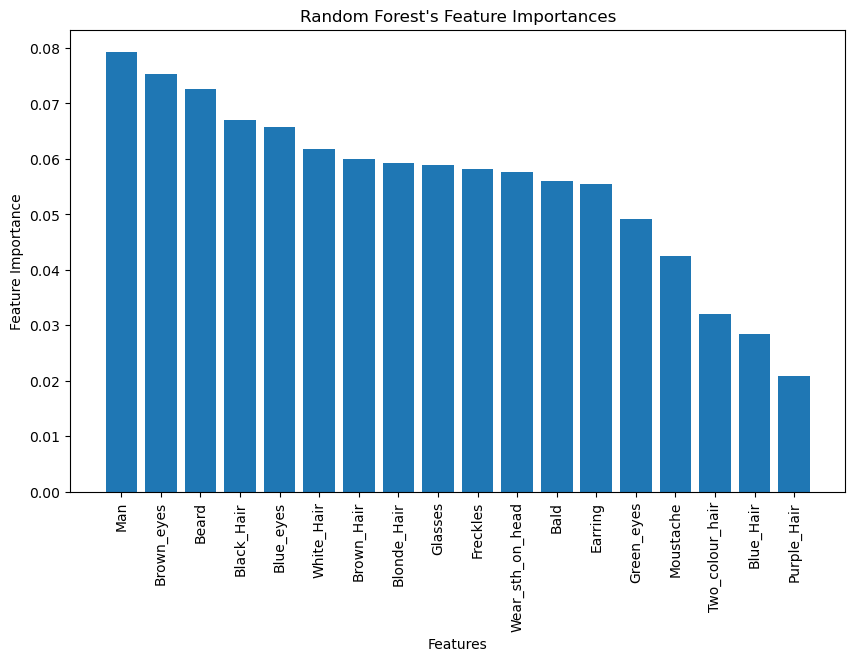

In [8]:
# Import necessary module
import numpy as np


# Analyze feature importances using the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Sort feature indices based on importance values in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sort feature names based on their importance values
sorted_features = X.columns[sorted_indices]

# Visualize feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title("Random Forest's Feature Importances")
plt.show()

Utilizing the most salient features identified by the Random Forest model, a Decision Tree is formulated. This entails constructing a decision-making framework wherein the identification of each character is facilitated through a methodical questioning process as it is done while playing the game. Specifically, a range spanning from a minimum of three to a maximum of eight (3-8) questions is systematically posed.

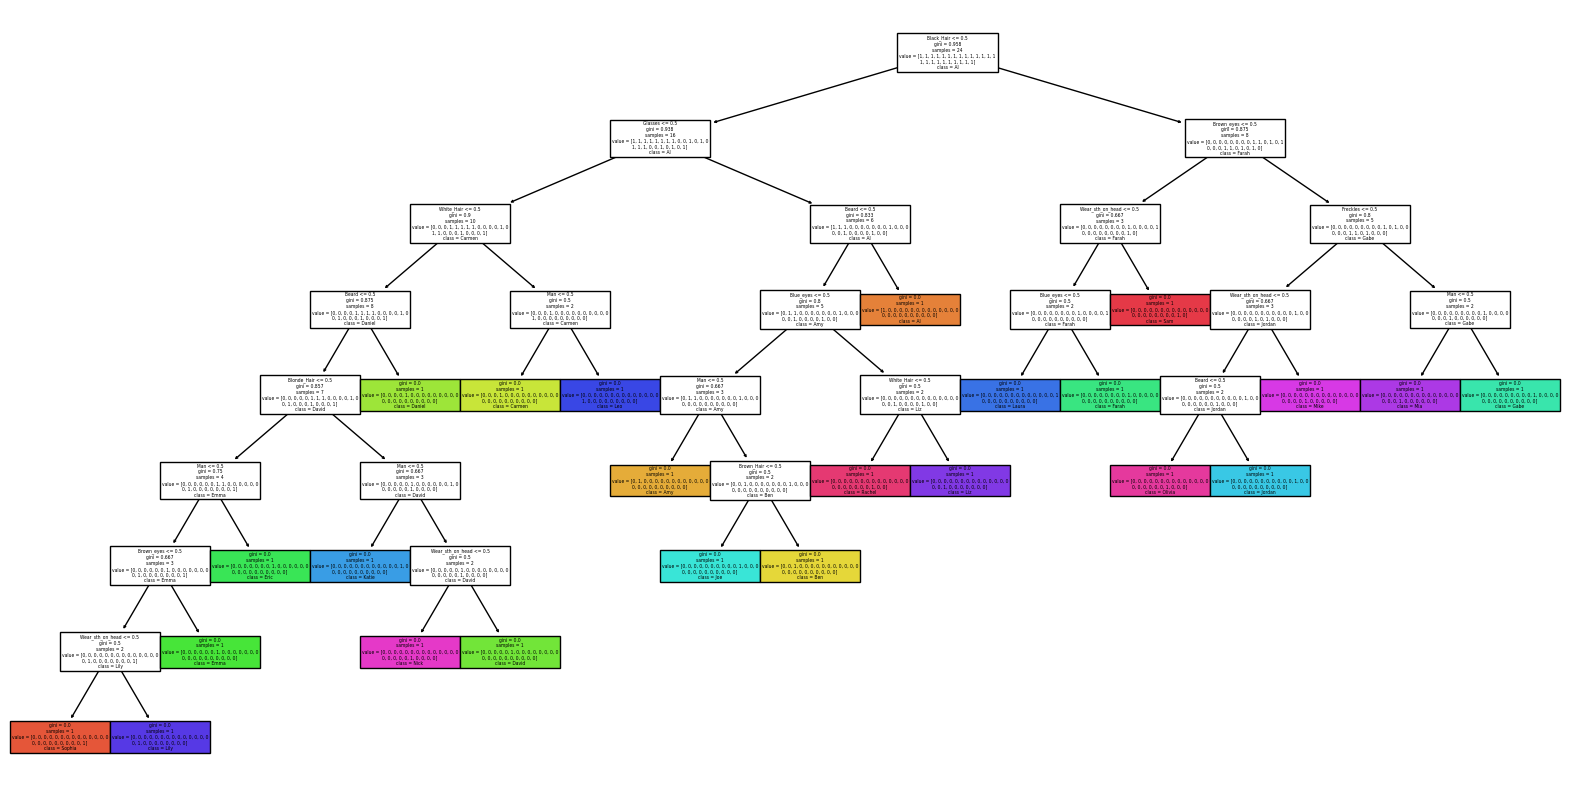

In [9]:
# Instantiate a DecisionTreeClassifier for utilizing the most important features identified by the Random Forest
rf_dt_classifier = DecisionTreeClassifier(random_state=0)

# Select the top 11 most important features from the feature set
X_selected = X[sorted_features[:11]]

# Train the DecisionTreeClassifier on the selected features and target variable
rf_dt_classifier.fit(X_selected, y)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(rf_dt_classifier, feature_names=X_selected.columns, class_names=y.unique(), filled=True)
plt.show()

Finally, the decision tree derived from the model training process is showcased in a format meticulously tailored to enhance clarity and comprehensibility. This endeavor encompasses the generation of a meticulously detailed graphical representation leveraging DOT data and the `Graphviz` graph visualization library. By delineating the decision-making pathways and criteria utilized by the classifier, this visualization provides a nuanced understanding of the underlying data patterns and classification mechanisms inherent within the decision tree model.

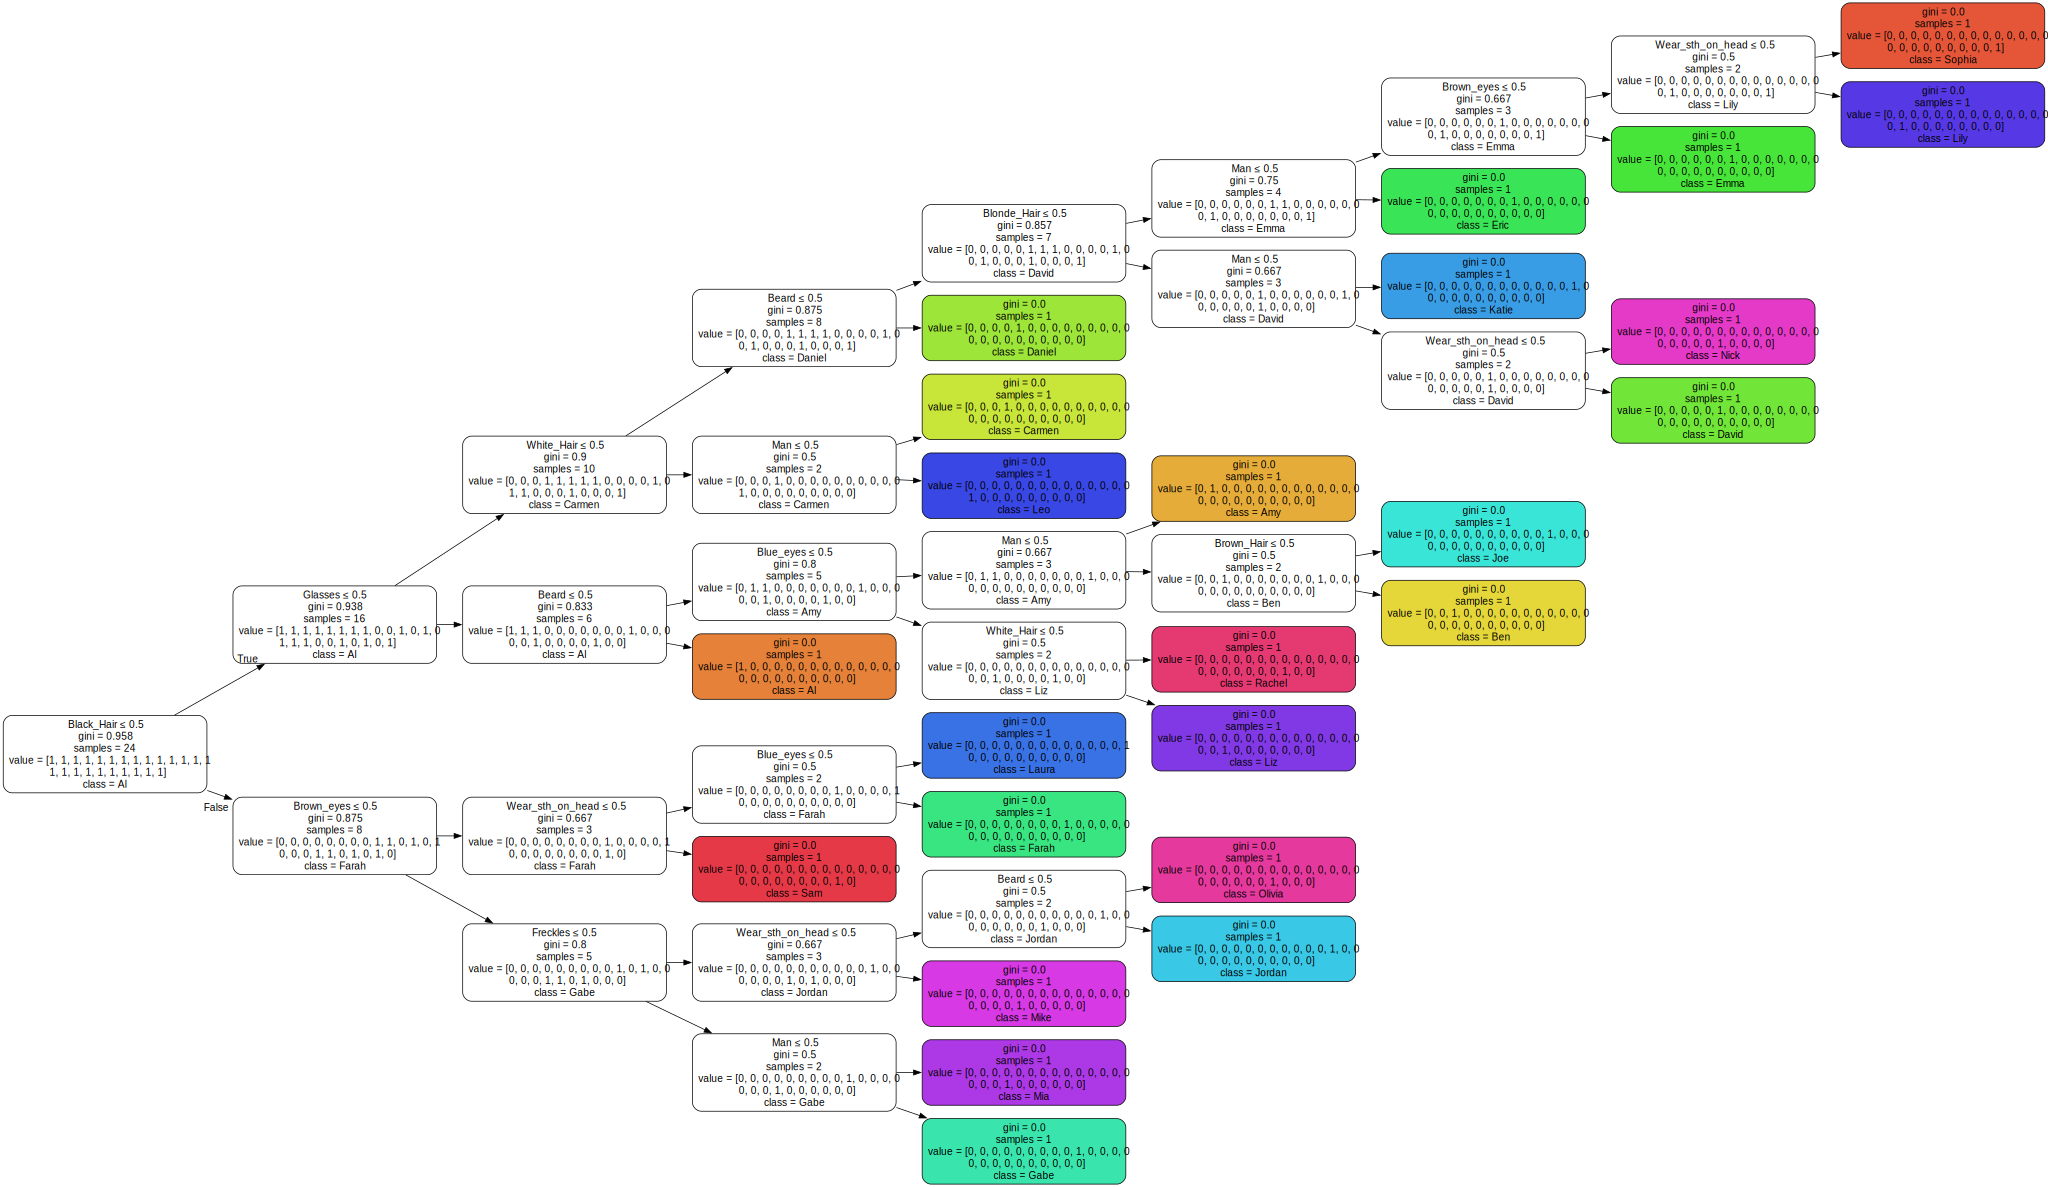

In [10]:
# Generate DOT data for the decision tree based on the Random Forest's Decision Tree classifier
dot_data = export_graphviz(rf_dt_classifier, out_file=None, 
                     feature_names=list(X_selected.columns.values),  
                     class_names=y.values,  
                     filled=True, rounded=True, rotate=True,
                     special_characters=True)  

# Create a graph object from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph
graph

## Gradient Boosting

Gradient Boosting represents a machine learning technique rooted in boosting within a functional space, wherein the target is pseudo-residuals as opposed to conventional residuals utilized in traditional boosting methodologies. This approach yields a prediction model in the guise of an ensemble comprising weak prediction models, denoted as models with minimal assumptions regarding the data, typically manifesting as simplistic decision trees. When the weak learner assumes the form of a decision tree, the resultant algorithm is termed gradient-boosted trees, which frequently outperform random forest methodologies.

Within the `Scikit-Learn` framework, the `GradientBoostingClassifier` undertakes gradient boosting for classification endeavors. This algorithm constructs an additive model in a progressive stage-wise manner, affording the opportunity for optimizing diverseiable loss functions of arbitrary nature. During each stage, `n_classes_` decision trees are fitted based on the negative gradient of the loss function, encompassing scenarios such as binary or multiclass log loss. It is noteworthy that binary classification represents a unique case wherein solely a singular decision tree is induced.

Firstly, the classifier is instantiated. This involves the specification of various parameters to govern the behavior and configuration of the classifier. The values assigned to each parameter during the instantiation process serve to delineate the operational characteristics and structural attributes of the Gradient Boosting model:

- **loss='log_loss'**: This parameter designates the loss function utilized during gradient boosting. In this instance, the logarithmic loss function, also known as log loss, is employed. Log loss measures the performance of a classification model by penalizing false classifications.
- **learning_rate=1.0**: This parameter denotes the learning rate, which regulates the magnitude of adjustments made to the model's parameters during each iteration. A value of 1.0 implies that each decision tree's contribution to the ensemble remains unchanged from the previous iteration. In other words, the updates to the model parameters are made at full strength, without any attenuation or scaling.
- **n_estimators=100**: This parameter specifies the number of decision trees employed in the gradient boosting ensemble. In this case, 100 decision trees are utilized.
- **subsample=1.0**: It determines the fraction of samples used for fitting each individual decision tree. A value of 1.0 signifies that the entire dataset is utilized for training each tree.
- **criterion='friedman_mse'**: This parameter denotes the criterion employed to evaluate the quality of splits in each decision tree. In this instance, the Friedman mean squared error (MSE) criterion is utilized.
- **min_samples_split=2**: It sets the minimum number of samples required to split an internal node in each decision tree. In this case, a node will only be split if it contains at least 2 samples.
- **min_samples_leaf=1**: This parameter specifies the minimum number of samples required to be at a leaf node in each decision tree. Each leaf in the tree will have at least one sample.
- **min_weight_fraction_leaf=0.0**: It sets the minimum weighted fraction of the sum total of weights required to be at a leaf node in each decision tree. In this case, the leaf nodes are not constrained by the sum of weights.
- **max_depth=3**: This parameter determines the maximum depth of each decision tree in the ensemble. A value of 3 indicates that each decision tree will have a maximum depth of 3 levels.
- **min_impurity_decrease=0.0**: It sets the minimum impurity decrease required for a split to be performed in each decision tree. A split will only be made if it induces a decrease in impurity greater than or equal to this value.
- **init=None**: This parameter determines the initial estimator utilized for predictions. A value of None implies that no initial estimator is provided.
- **random_state=0**: It sets the random seed used by the random number generator. By fixing the random state to a specific value (0 in this case), the randomness of the model's behavior is controlled, ensuring reproducible results.
- **max_features=None**: This parameter determines the number of features to consider when looking for the best split in each decision tree. A value of None indicates that all features will be considered.
- **verbose=0**: This parameter controls the verbosity of the output during fitting. Here, verbosity is set to 0, indicating silent mode.
- **max_leaf_nodes=None**: This parameter sets the maximum number of leaf nodes in each decision tree. A value of None implies that there is no maximum limit on the number of leaf nodes.
- **warm_start=False**: It specifies whether to reuse the solution of the previous call to fit and add more estimators to the ensemble. Here, warm starting is disabled.
- **validation_fraction=0.1**: This parameter determines the proportion of training data to set aside as validation data for early stopping. In this case, 10% of the training data is reserved for validation.
- **n_iter_no_change=None**: It sets the maximum number of iterations with no improvement in the validation score before early stopping is activated. A value of None implies that early stopping is not utilized.
- **tol=0.0001**: This parameter sets the tolerance for the early stopping criterion. Early stopping is triggered when the validation score fails to improve by more than this tolerance for n_iter_no_change consecutive iterations.
- **ccp_alpha=0.0**: It sets the complexity parameter used for Minimal Cost-Complexity Pruning in each decision tree. A higher value of ccp_alpha increases the amount of pruning, resulting in simpler trees.

Subsequent to instantiation, the classifier undergoes a training phase utilizing the features and class labels present within the dataset. Following training, the accuracy score of the classifier is computed and printed. This quantitative evaluation metric provides insight into the model's efficacy in correctly predicting class labels. The attainment of peak accuracy signifies the optimal performance achieved by the trained model, indicating its ability to accurately classify instances within the dataset.

In [11]:
# Import necessary module from scikit-learn
from sklearn.ensemble import GradientBoostingClassifier


# Create an instance of a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(loss='log_loss', learning_rate=1.0, n_estimators=100, subsample=1.0, 
                                           criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                           min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                           init=None, random_state=0, max_features=None, verbose=0, 
                                           max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                           n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Train the Gradient Boosting classifier on the features (X) and target variable (y)
gb_classifier.fit(X, y)

# Calculate the accuracy score of the classifier on the training set
accuracy = gb_classifier.score(X, y)
accuracy

1.0

Afterwards, the significance of each feature in predicting the target variable is determined via the trained model. This involves quantifying the individual contribution of each feature towards the model's predictive performance.

Moreover, the feature importances are graphically depicted using bar plots, providing a visual representation of the relative importance of each feature in influencing the model's predictions. This graphical representation aids in understanding the relative significance of different features and their impact on the overall predictive accuracy of the model.

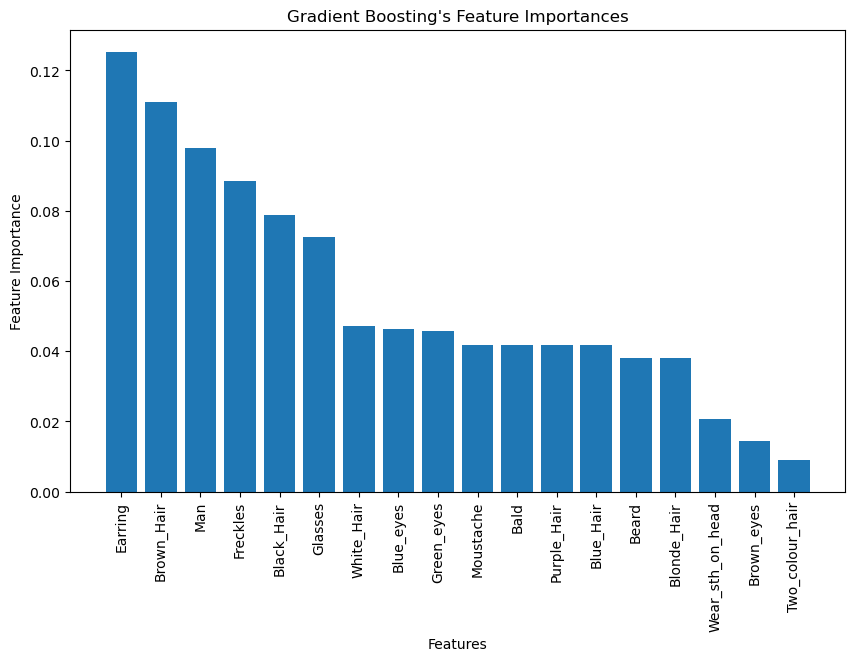

In [12]:
# Analyze feature importances using the trained Gradient Boosting classifier
feature_importances = gb_classifier.feature_importances_

# Sort feature indices based on importance values in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sort feature names based on their importance values
sorted_features = X.columns[sorted_indices]

# Visualize feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title("Gradient Boosting's Feature Importances")
plt.show()

Utilizing the most prominent features identified by the Gradient Boosting model, a Decision Tree is constructed. This involves establishing a decision-making framework where each character's identification is facilitated through a systematic questioning process akin to that employed in the game. Specifically, a series of questions ranging from a minimum of three to a maximum of six (3-6) are methodically posed. This approach represents the optimal solution to the presented challenge, enabling precise and efficient character identification within the context of the game.

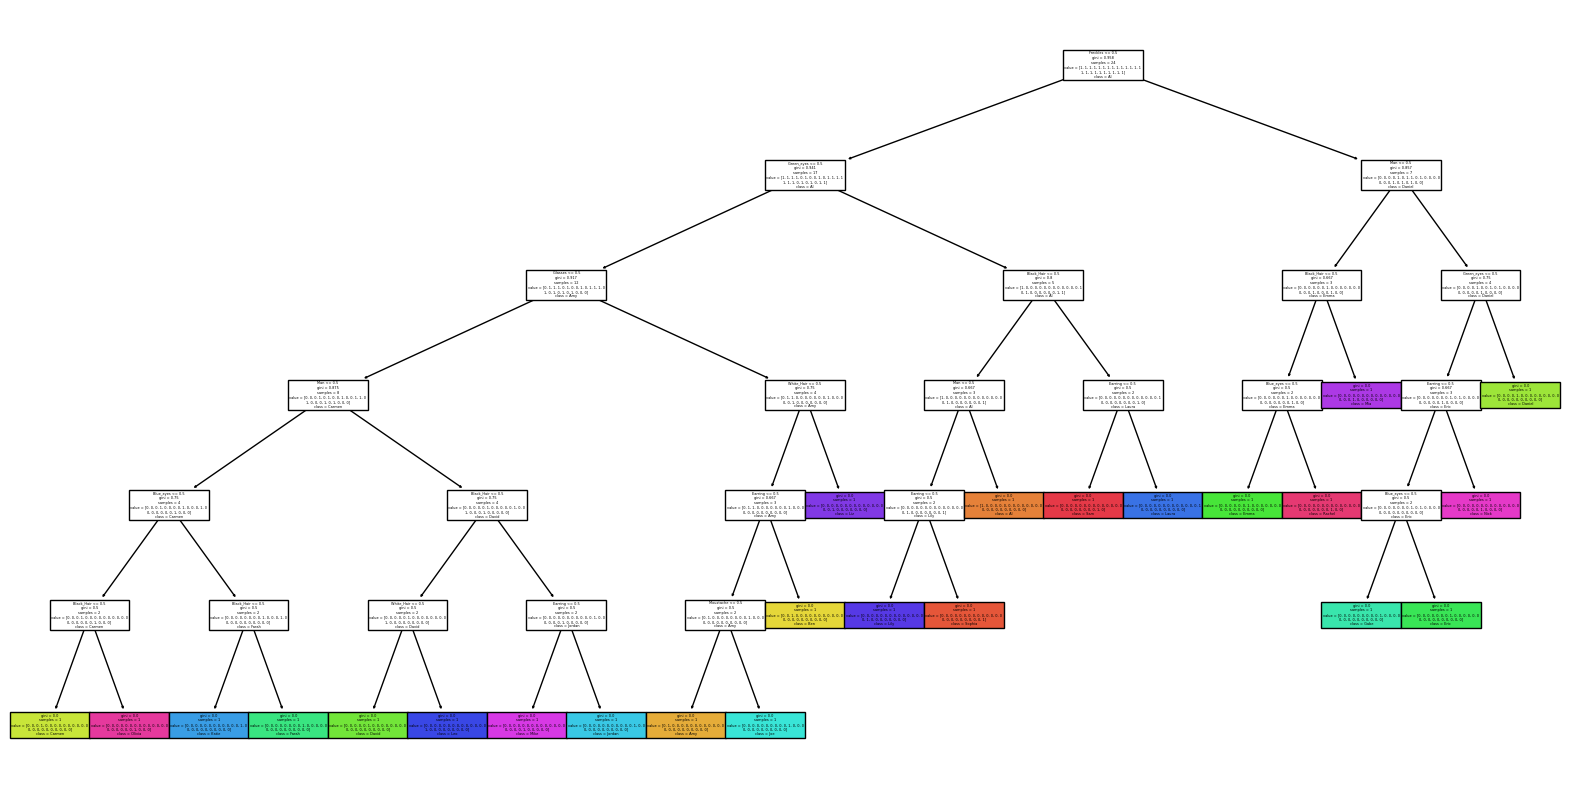

In [13]:
# Instantiate a DecisionTreeClassifier to utilize the most important features identified by Gradient Boosting
gb_dt_classifier = DecisionTreeClassifier(random_state=0)

# Select the top 11 most important features from the feature set
X_selected = X[sorted_features[:11]]

# Train the DecisionTreeClassifier on the selected features and target variable
gb_dt_classifier.fit(X_selected, y)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(gb_dt_classifier, feature_names=X_selected.columns, class_names=y.unique(), filled=True)
plt.show()

In conclusion, the decision tree resulting from the model training procedure is presented in a better-crafted format designed to optimize clarity and comprehensibility. This undertaking entails the generation of a detailed graphical depiction utilizing DOT data and the `Graphviz` graph visualization library. Through delineating the decision-making pathways and criteria employed by the classifier, this visualization affords a nuanced comprehension of the underlying data patterns and classification mechanisms inherent within the decision tree model.

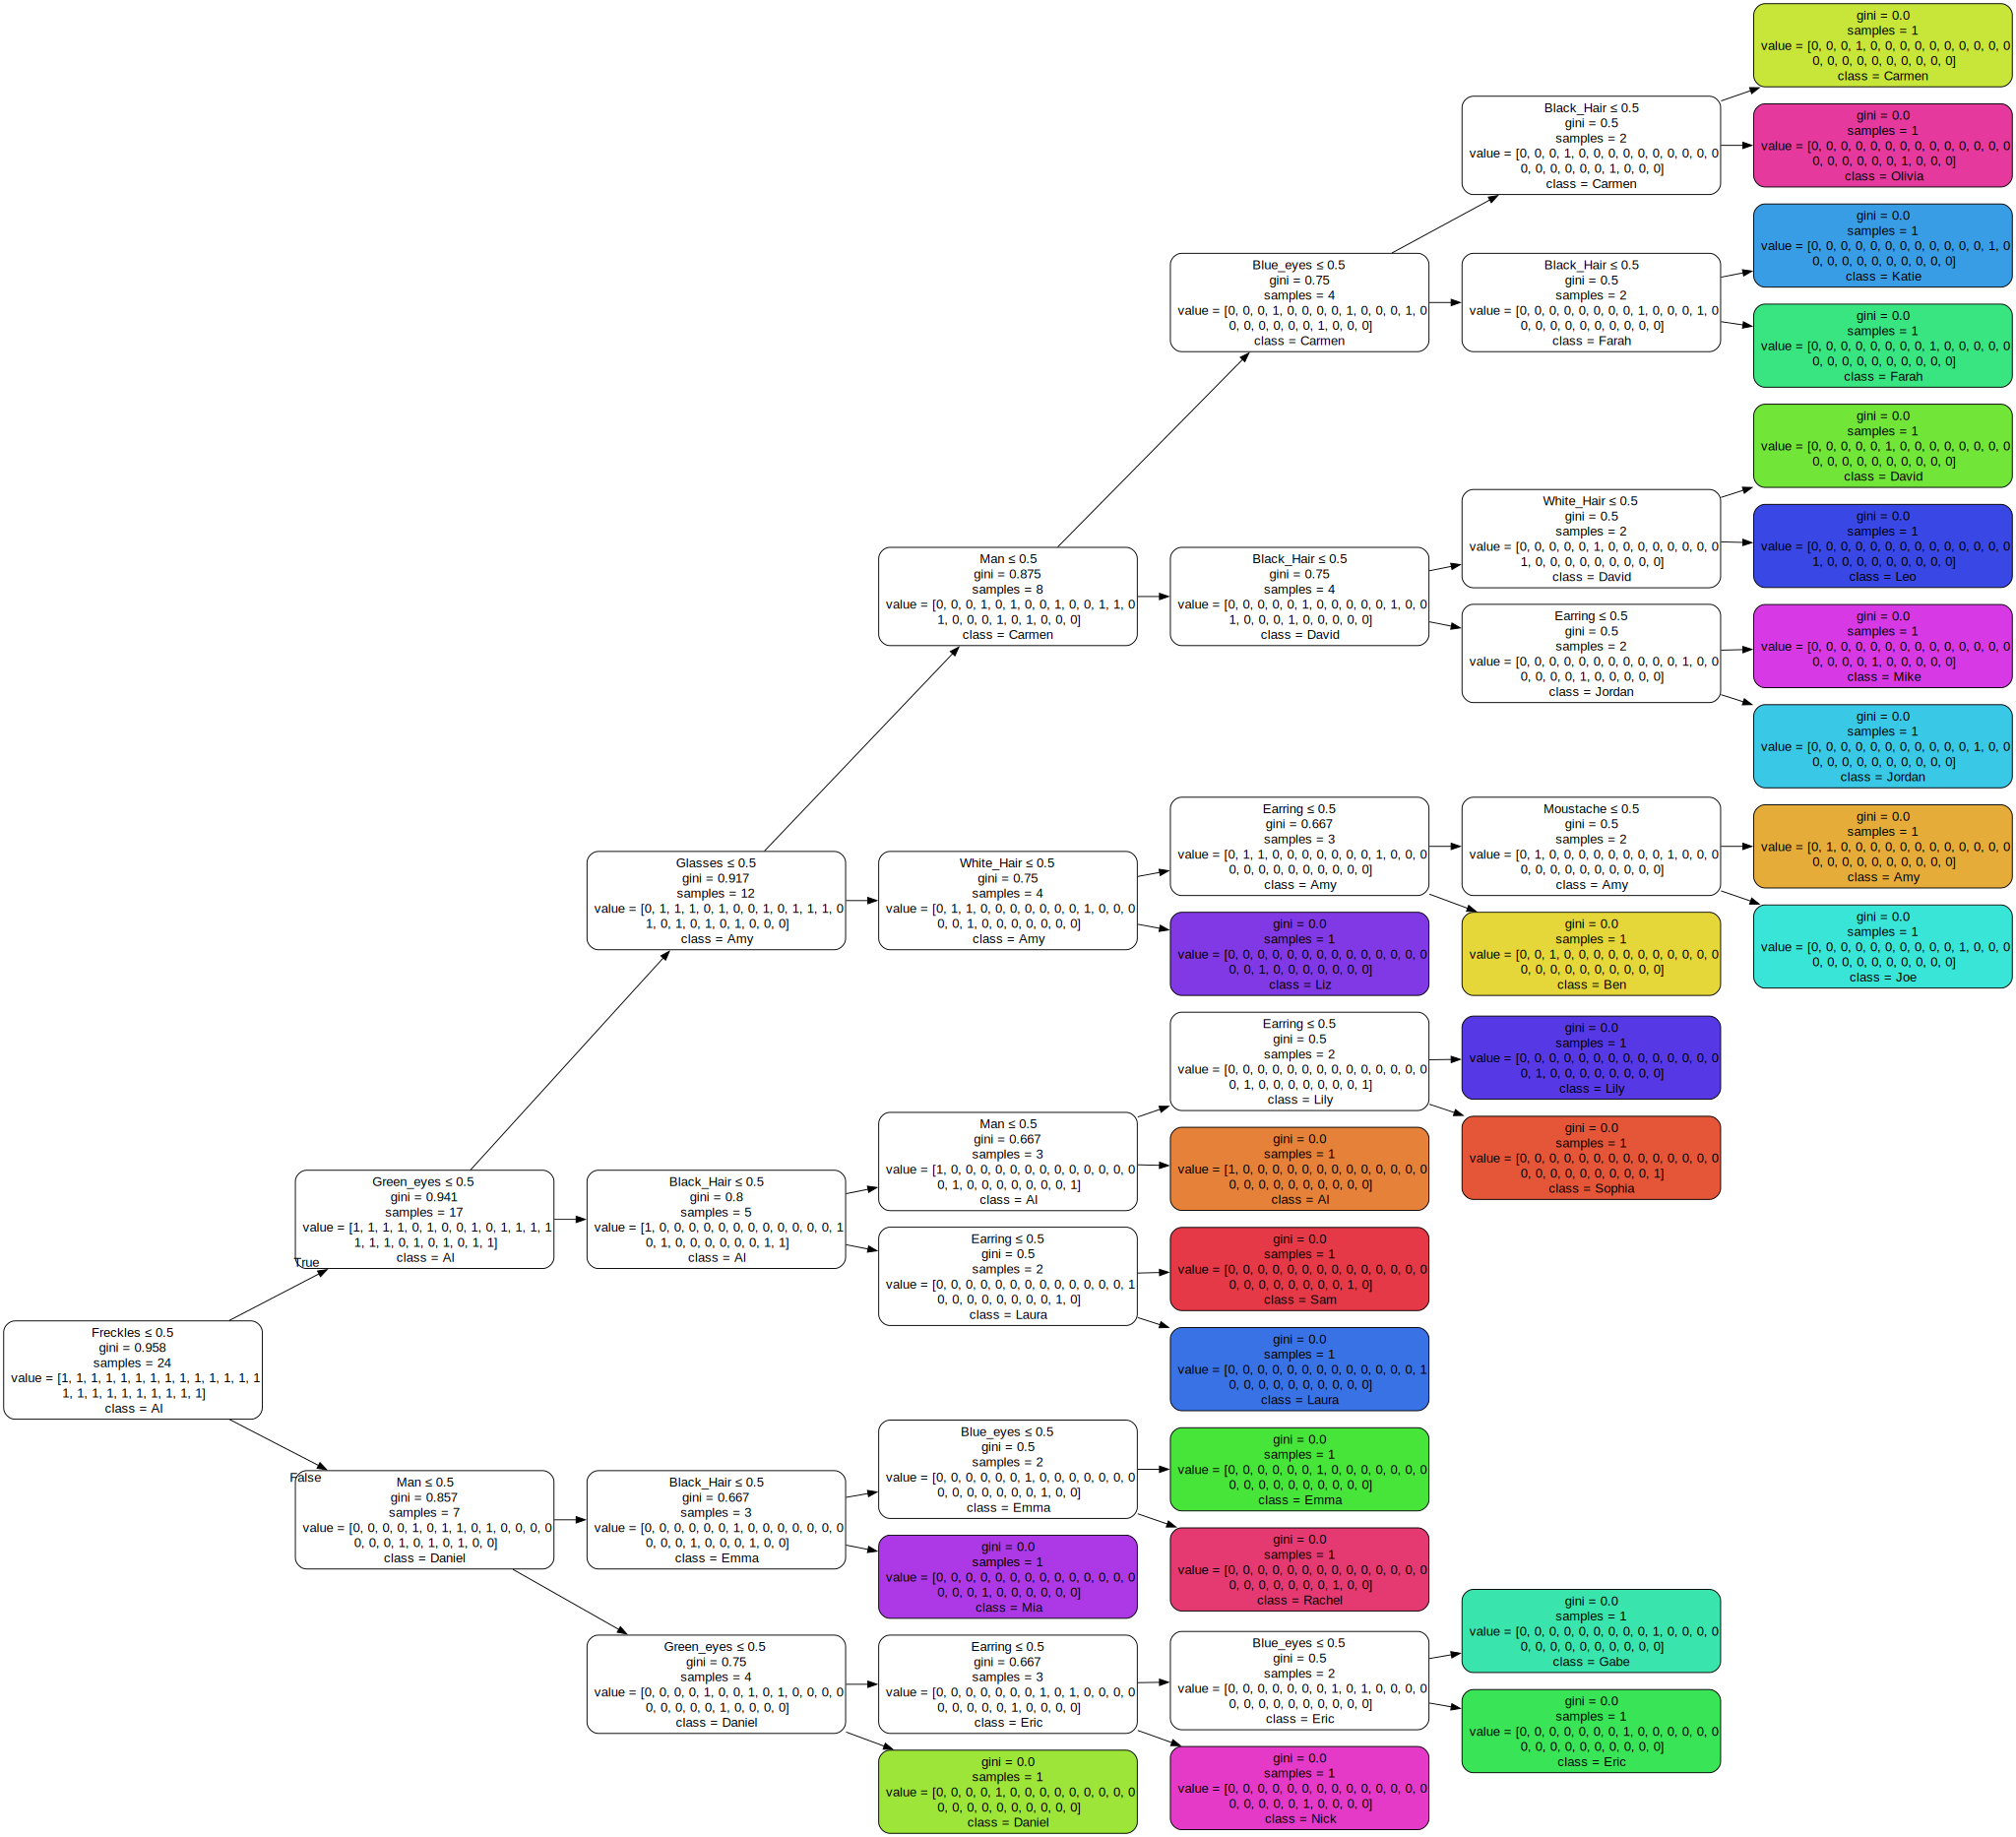

In [14]:
# Generate DOT data for the decision tree based on the Gradient Boosting's Decision Tree classifier
dot_data = export_graphviz(gb_dt_classifier, out_file=None, 
                     feature_names=list(X_selected.columns.values),  
                     class_names=y.values,  
                     filled=True, rounded=True, rotate=True,
                     special_characters=True)

# Create a graph object from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph
graph

## LightGBM

`LightGBM` represents a gradient boosting framework employing tree-based learning algorithms. It is engineered to offer distributed and efficient functionality, boasting several advantages:

- Accelerated training speed and heightened efficiency.
- Reduced memory consumption.
- Enhanced accuracy in predictive modeling.
- Support for parallel, distributed, and GPU-based learning.
- Ability to accommodate large-scale datasets.

Initially, the instantiation of the `LGBMClassifier` is executed. This entails the specification of various parameters dictating the behavior and configuration of the classifier. The values attributed to each parameter during instantiation serve to delineate the operational characteristics and structural attributes of the Gradient Boosting model:

- **boosting_type='gbdt'**: This parameter specifies the type of boosting algorithm used. In this case, 'gbdt' refers to Gradient Boosting Decision Tree, which is the default boosting type for LightGBM.
- **num_leaves=24**: It sets the maximum number of leaves in each tree. A larger value allows the model to capture more complex patterns, but it also increases the risk of overfitting.
- **max_depth=3**: This parameter specifies the maximum depth of each tree. A value of 3 indicates that each decision tree will have a maximum depth of 3 levels.
- **learning_rate=0.05**: It determines the step size at each iteration during the gradient descent process. A smaller learning rate typically results in slower but more stable convergence.
- **n_estimators=100**: This parameter specifies the number of boosting rounds or iterations. It denotes the number of trees to be built in the ensemble.
- **subsample_for_bin=200000**: It sets the number of samples used for constructing histogram bins. A larger value may improve the accuracy of the splits but also increases memory usage.
- **objective=None**: This parameter specifies the loss function to be optimized during training. A value of None implies that the default objective function for the specified task (e.g., binary classification, multiclass classification) will be used.
- **class_weight=None**: It allows specifying weights for different classes to handle class imbalance. A value of None indicates that all classes are treated equally.
- **min_split_gain=0.0**: This parameter sets the minimum gain required for a split to occur. It controls the minimum improvement in loss function that must be achieved to make a split.
- **min_child_weight=0.001**: It sets the minimum sum of instance weights (Hessian) required to create a new child node in the tree.
- **min_child_samples=1**: This parameter specifies the minimum number of samples required to create a new child node in the tree. It controls the minimum size of leaf nodes.
- **subsample=1.0**: It determines the fraction of samples used for training each tree. A value of 1.0 indicates that all samples are used.
- **subsample_freq=0**: This parameter controls the frequency of subsampling. A value of 0 indicates no subsampling frequency.
- **colsample_bytree=1.0**: It specifies the fraction of features to be randomly selected for each tree. A value of 1.0 indicates that all features are considered.
- **reg_alpha=0.0**: This parameter sets the L1 regularization term on weights. It helps to prevent overfitting by penalizing large weights.
- **reg_lambda=0.0**: It sets the L2 regularization term on weights. Similar to reg_alpha, reg_lambda helps to prevent overfitting by penalizing large weights.
- **random_state=0**: It sets the random seed used for reproducibility. By fixing the random state to a specific value (0 in this case), the randomness of the model's behavior is controlled.
- **n_jobs=None**: This parameter specifies the number of threads to use for training. A value of None indicates that all available CPU cores will be used.
- **importance_type='split'**: It determines how feature importance is calculated. 'split' indicates that importance is calculated based on the number of times a feature is used to split the data across all trees.

Following instantiation, the classifier undergoes a training phase utilizing the features and class labels inherent in the dataset. Subsequent to training, the accuracy score of the classifier is computed and presented. This quantitative evaluation metric offers valuable insights into the model's efficacy in accurately predicting class labels. The attainment of peak accuracy denotes the optimal performance achieved by the trained model, highlighting its adeptness in accurately classifying instances within the dataset.

In [15]:
# Import necessary modules
import sys, os
from lightgbm import LGBMClassifier, plot_importance

# Save the current state of stdout
original_stdout = sys.stdout

# Redirect stdout to os.devnull
sys.stdout = open(os.devnull, 'w')

# Create an instance of a LightGBM classifier with adjusted parameters
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=24, max_depth=3, learning_rate=0.05, n_estimators=100, 
                                subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, 
                                min_child_weight=0.001, min_child_samples=1, subsample=1.0, subsample_freq=0, 
                                colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=0, n_jobs=None, 
                                importance_type='split')

# Train the LightGBM classifier on the features (X) and target variable (y)
lgb_classifier.fit(X, y)

# Restore the original state of stdout
sys.stdout = original_stdout

# Predict the target variable on the training set and calculate the accuracy of the classifier (for demonstration purposes)
y_pred = lgb_classifier.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Subsequently, the significance of each feature in predicting the target variable is assessed through the trained model. This process entails quantifying the unique contribution of each feature to the model's predictive performance.

Furthermore, the feature importances are visually illustrated using bar plots, offering a graphical portrayal of the relative importance of each feature in influencing the model's predictions. This graphical representation facilitates comprehension of the relative significance of diverse features and their collective impact on the overall predictive accuracy of the model.

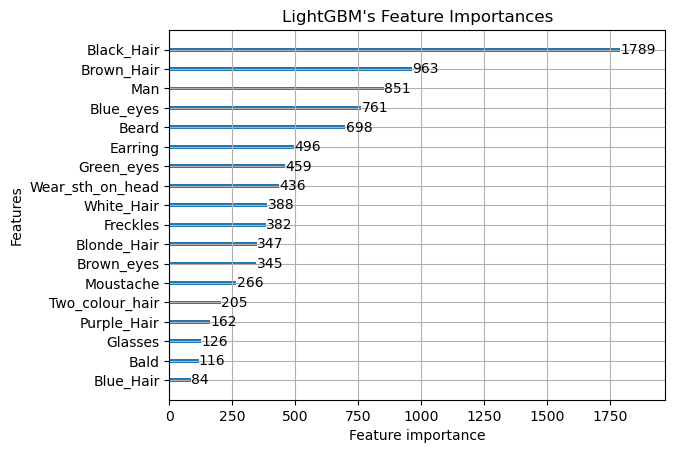

In [16]:
# Visualize feature importances using the plot_importance function from LightGBM
plot_importance(lgb_classifier)

# Set the title for the plot
plt.title("LightGBM's Feature Importances")

# Display the plot
plt.show()

Employing the most salient features identified by the LightGBM model, a Decision Tree is formulated. This entails crafting a decision-making framework wherein the identification of each character is facilitated through a structured inquiry process reminiscent of the game's mechanics. Specifically, a series of questions, ranging from a minimum of three to a maximum of seven (3-7), are systematically posed.

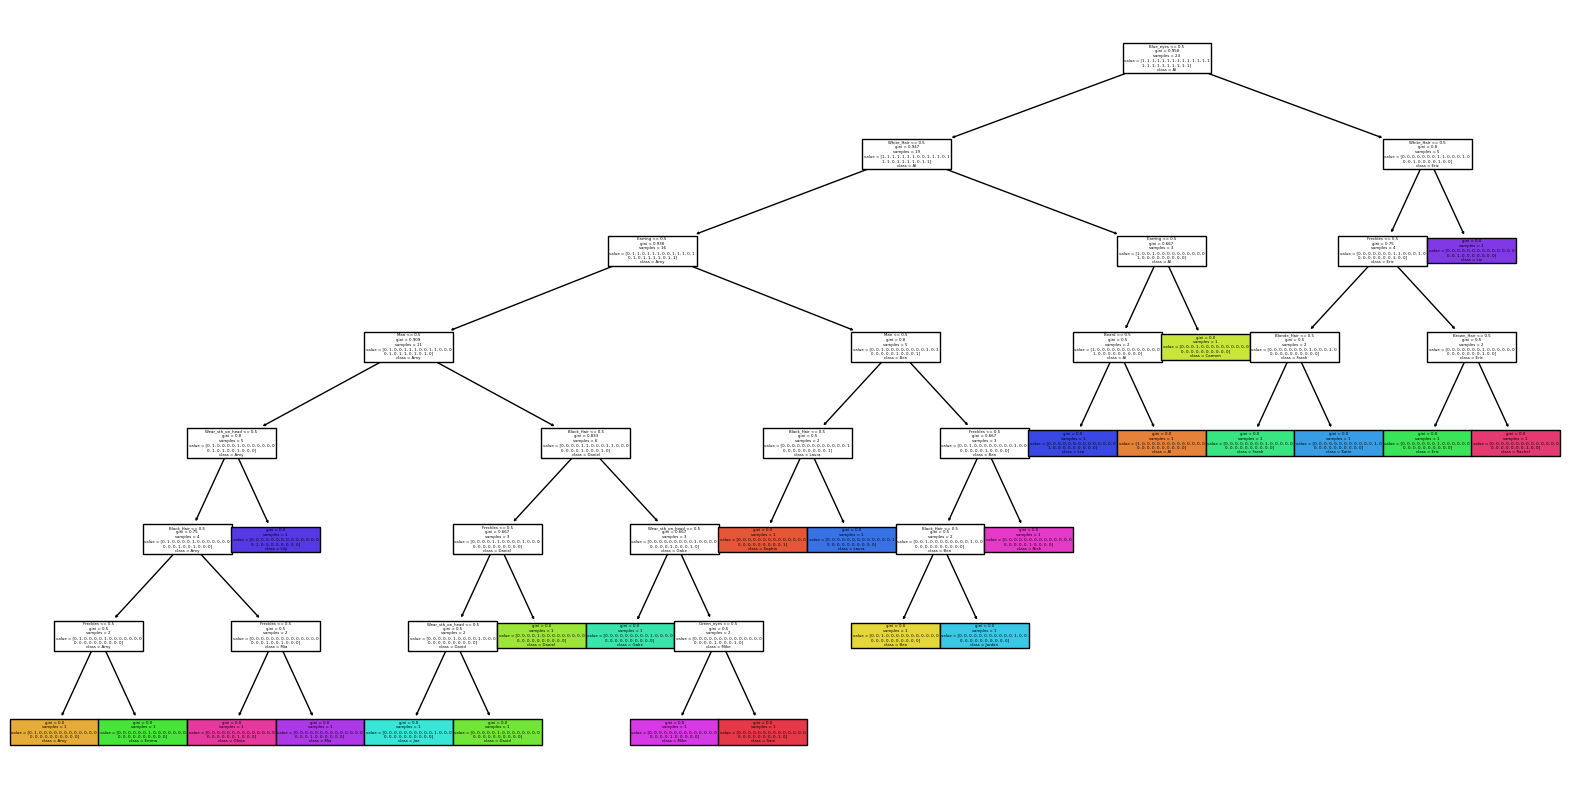

In [17]:
# Analyze feature importances using the feature_importances_ attribute of the LightGBM classifier
feature_importances = lgb_classifier.feature_importances_

# Sort feature indices based on importance values in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sort feature names based on their importance values
sorted_features = X.columns[sorted_indices]

# Instantiate a DecisionTreeClassifier to utilize the most important features identified by LightGBM
lgb_dt_classifier = DecisionTreeClassifier(random_state=0)

# Select the top 11 most important features from the feature set
X_selected = X[sorted_features[:11]]

# Train the DecisionTreeClassifier on the selected features and target variable
lgb_dt_classifier.fit(X_selected, y)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(lgb_dt_classifier, feature_names=X_selected.columns, class_names=y.unique(), filled=True)
plt.show()

Ultimately, the decision tree resulting from the model training process is presented in a meticulously customized format designed to augment lucidity and comprehensibility. This endeavor encompasses the generation of an intricately detailed graphical depiction leveraging DOT data and the Graphviz graph visualization library. By delineating the decision-making pathways and criteria employed by the classifier, this visualization furnishes a nuanced comprehension of the underlying data patterns and classification mechanisms intrinsic to the decision tree model.

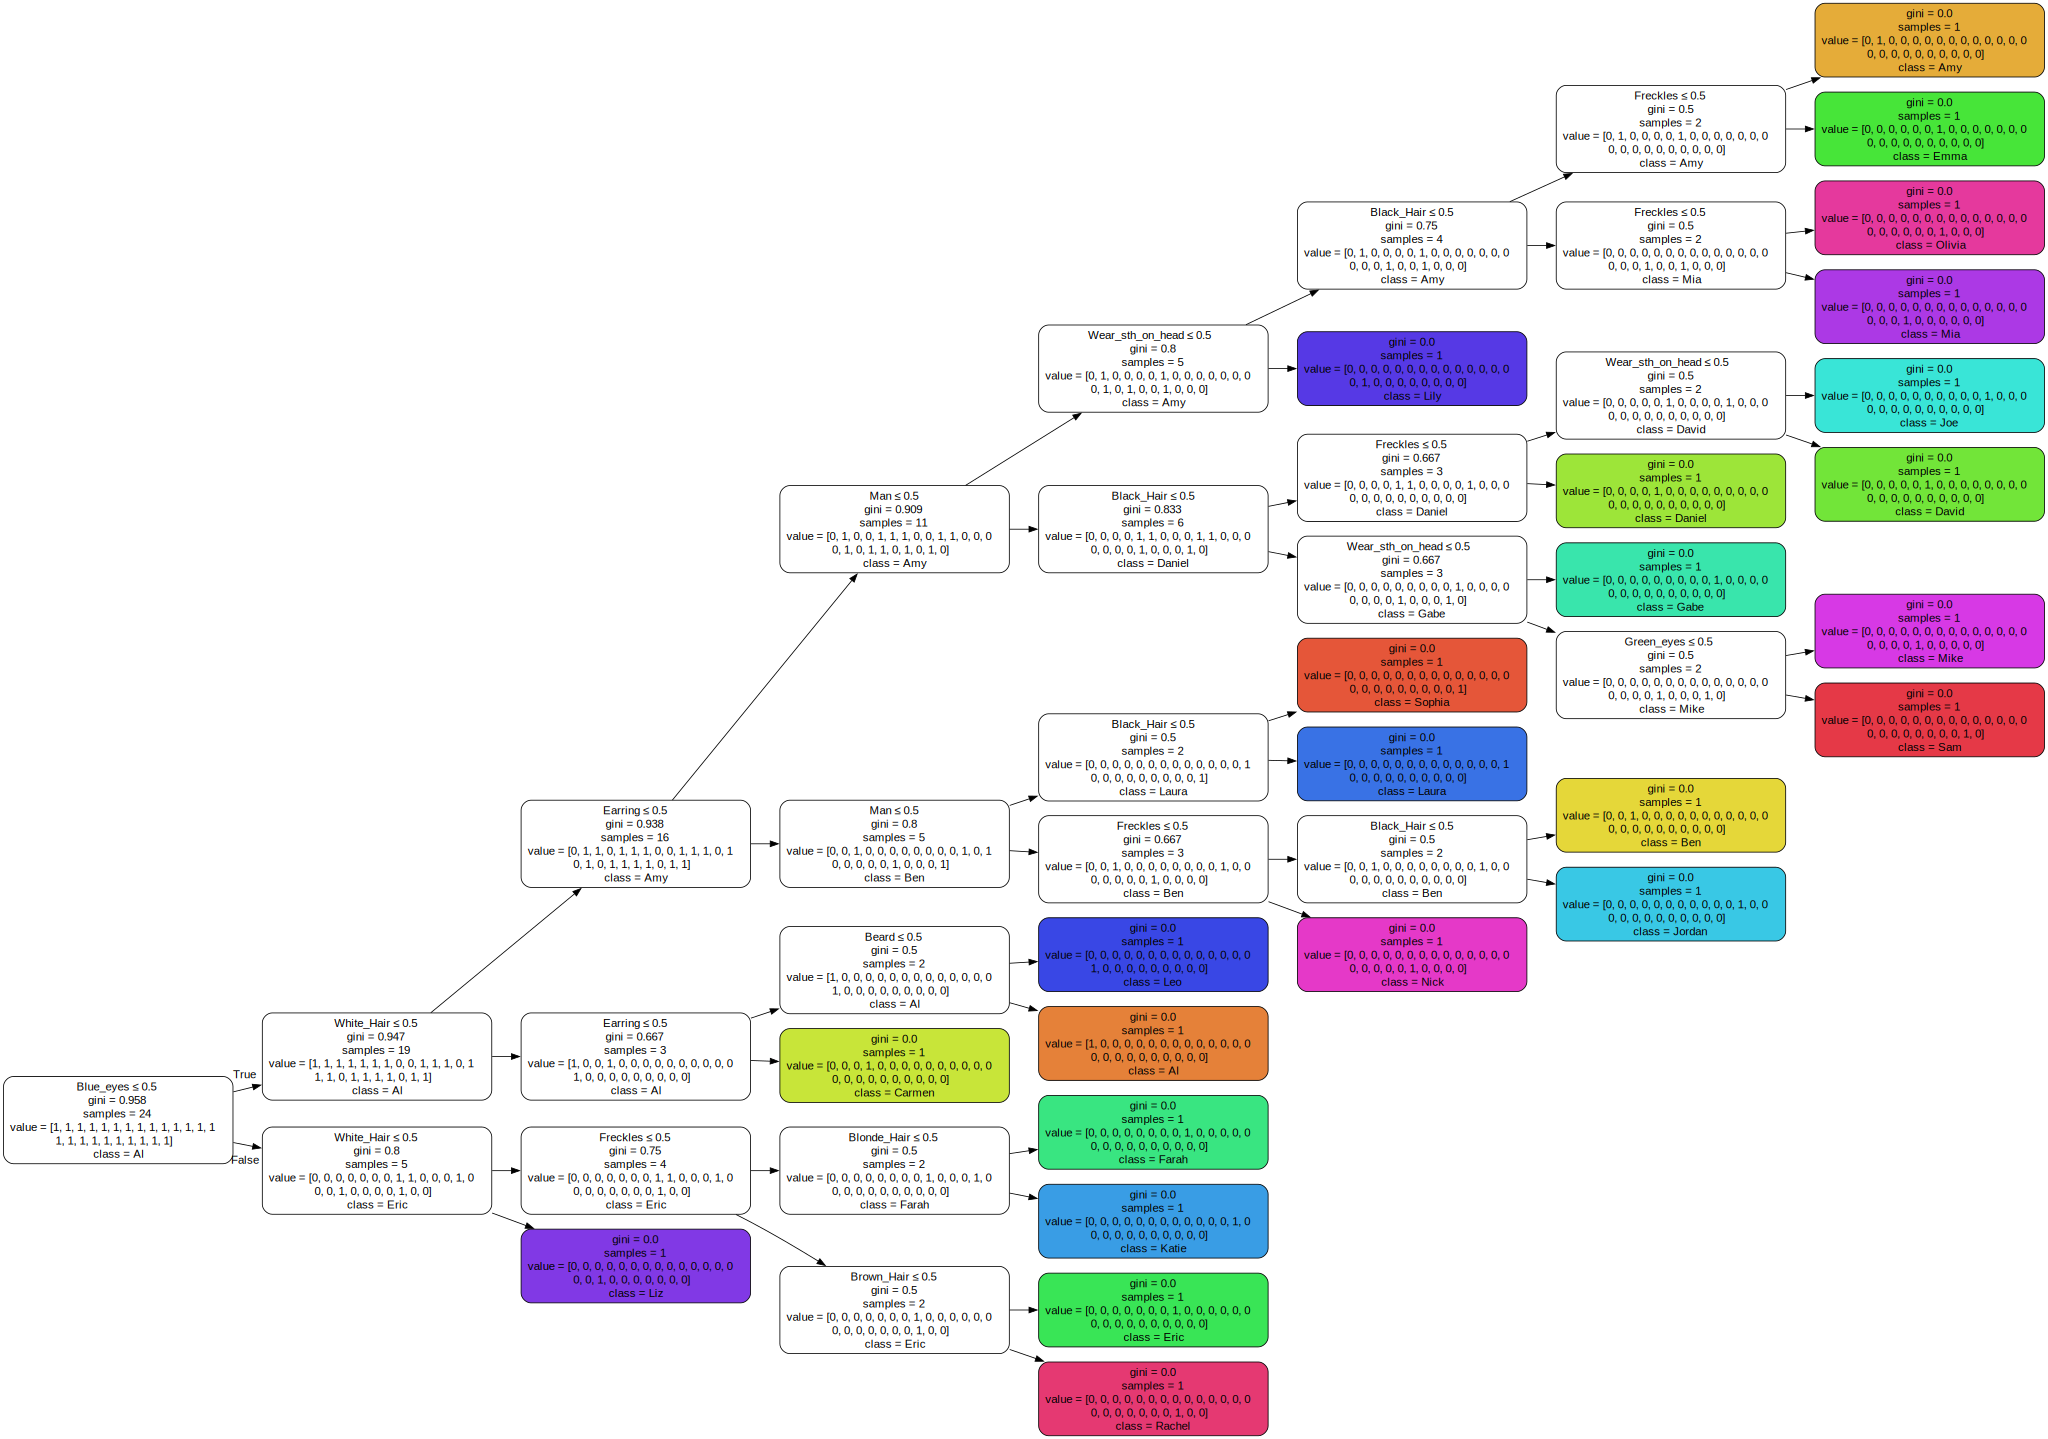

In [18]:
# Generate DOT data for the decision tree based on the LightGBM's Decision Tree classifier
dot_data = export_graphviz(lgb_dt_classifier, out_file=None, 
                     feature_names=list(X_selected.columns.values),  
                     class_names=y.values,  
                     filled=True, rounded=True, rotate=True,
                     special_characters=True)

# Create a graph object from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph
graph

## Models Summary

### Model Ranking by Questions for Character Identification

| Models | Min # Questions | Max # Questions |
| :---   |  ---: |       ---: |
| 1. GradientBoostingClassifier | 3 | 6 |
| 2. LGBMClassifier | 3 | 7 |
| 3. RandomForestClassifier | 3 | 8 |
| 4. DecisionTreeClassifier | 3 | 8 |

In [19]:
# Generate a requirements.txt file containing the dependencies of the current Jupyter Notebook environment
# !pipreqsnb --savepath requirements.txt ./